In [21]:
import numpy as np
from scipy import stats
import pandas as pd
import time
#import math
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt

# Block Bootstrap
#from arch.bootstrap import StationaryBootstrap
# Time Series cross-validation
#from sklearn.model_selection import TimeSeriesSplit

# Class encoder
#from sklearn.preprocessing import LabelEncoder 


## Loading data 

In [22]:
name = "DF_CURATED_2022_12_7_11.csv"

In [23]:
df = pd.read_csv('..\\Extraction\\DATA_cURATED\\'+name)

In [24]:
df = df.dropna()

In [25]:
df.index = df["Date"]

In [26]:
df.drop(["Date"],1,inplace=True)

C:\Users\PCALAT~1\AppData\Local\Temp/ipykernel_37816/1022212316.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["Date"],1,inplace=True)


In [27]:
df.shape

(4981, 25)

In [31]:
df.head(5)

,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-18,-0.038352,-0.026385,881.559998,1736300000,0.026739,3,29,7,0.030888,0.0,...,-0.002273,-0.000765,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-20.428083,24.627836
2002-07-19,-0.032922,-0.038352,847.750000,2654100000,0.039107,4,29,7,0.046896,0.0,...,0.048051,0.002408,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-22.343688,21.351079
2002-07-22,-0.027017,-0.032922,819.849976,2248060000,0.033476,0,30,7,0.050255,0.0,...,0.070023,0.003929,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-24.872814,20.786866
2002-07-23,0.057314,-0.027017,797.700012,2441020000,0.027389,1,30,7,0.039642,0.0,...,0.062692,0.007462,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-27.915234,20.657899
2002-07-24,-0.005620,0.057314,843.429993,2775560000,-0.055732,2,30,7,0.088490,0.0,...,-0.172514,-0.007244,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-30.291201,31.330634


In [28]:
list(df.keys())

['Y_next_daily_returns',
 'simple_daily_returns',
 'Close',
 'Volume',
 'log_daily_returns',
 'day-of-week',
 'week-of-year',
 'month-of-year',
 'day_volatility_%',
 'gold_returns',
 'oil_returns',
 'treasury_13w_returns',
 'treasury_10y_returns',
 'nasdaq_returns',
 'dowJones_returns',
 'VIX_returns',
 'US_returns',
 'GDP',
 'CPILFESL',
 'PCE',
 'UMCSENT',
 'INDPRO',
 'IPMAN',
 'MACD_Signal',
 'RSI']

## The goal is to transform the data set to 0 or 1. 
#### 0 == down
#### 1 ==up

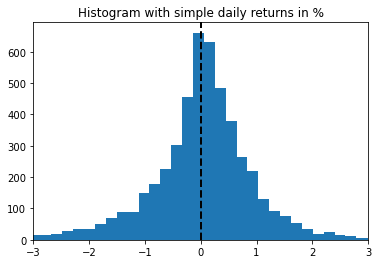

In [47]:
plt.hist(df["Y_next_daily_returns"]*100, bins=100)
plt.title("Histogram with simple daily returns in %")
plt.axvline(0, color='k', linestyle='--', linewidth=2)
plt.xlim([-3, 3])
plt.show()

## Labeling classes

In [34]:
label=[]
for i in range(len(df["Y_next_daily_returns"])):

    if df["Y_next_daily_returns"][i]<=0:
        
        label.append(0)
        
    elif df["Y_next_daily_returns"][i]>0:
    
        label.append(1)

In [35]:
#Testing that all the returns are classified correctly
my_list = list(set(label))
my_list

[0, 1]

In [38]:
df["Y_label"]=label
df= df[ ["Y_label"] + [ col for col in df.columns if col != "Y_label" ]]

In [39]:
df.head(10)

,Y_label,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2002-07-18,0,-0.038352,-0.026385,881.559998,1736300000,0.026739,3,29,7,0.030888,...,-0.002273,-0.000765,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-20.428083,24.627836
2002-07-19,0,-0.032922,-0.038352,847.750000,2654100000,0.039107,4,29,7,0.046896,...,0.048051,0.002408,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-22.343688,21.351079
2002-07-22,0,-0.027017,-0.032922,819.849976,2248060000,0.033476,0,30,7,0.050255,...,0.070023,0.003929,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-24.872814,20.786866
2002-07-23,1,0.057314,-0.027017,797.700012,2441020000,0.027389,1,30,7,0.039642,...,0.062692,0.007462,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-27.915234,20.657899
2002-07-24,0,-0.005620,0.057314,843.429993,2775560000,-0.055732,2,30,7,0.088490,...,-0.172514,-0.007244,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-30.291201,31.330634
2002-07-25,1,0.016884,-0.005620,838.679993,2424700000,0.005636,3,30,7,0.046219,...,-0.033948,-0.001615,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-32.141147,21.718514
2002-07-26,1,0.054078,0.016884,852.840027,1796100000,-0.016743,4,30,7,0.020253,...,-0.080290,0.012152,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-33.272124,26.832644
2002-07-29,1,0.004249,0.054078,898.960022,1778650000,-0.052667,0,31,7,0.054078,...,-0.075538,0.003749,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-33.098415,40.708546
2002-07-30,1,0.009792,0.004249,902.780029,1826090000,-0.004240,1,31,7,0.028382,...,-0.003745,-0.003545,0.008871,0.001577,0.008849,-0.046537,-0.000229,-0.001066,-31.997111,46.615660


In [40]:
df.tail(10)

,Y_label,Y_next_daily_returns,simple_daily_returns,Close,Volume,log_daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-16,1,0.009094,-0.001248,4008.010010,4415030000,0.001249,0,20,5,0.015680,...,-0.084638,-0.002680,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-95.918640,41.064213
2022-05-17,0,-0.031664,0.009094,4088.850098,4841410000,-0.009053,1,20,5,0.014078,...,-0.035833,-0.007776,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-97.143953,45.280326
2022-05-18,1,0.000459,-0.031664,3923.679932,5103220000,0.032176,2,20,5,0.035806,...,0.157816,0.004548,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-99.051228,32.986652
2022-05-19,0,-0.006721,0.000459,3900.790039,5113550000,-0.000459,3,20,5,0.017897,...,-0.060499,-0.010691,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-101.425396,37.659884
2022-05-20,1,0.013862,-0.006721,3901.360107,5130730000,0.006744,4,20,5,0.034931,...,0.022585,0.002430,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-103.727483,36.098779
2022-05-23,0,-0.000370,0.013862,3973.750000,4420030000,-0.013767,0,21,5,0.018634,...,-0.017253,-0.009221,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-104.472357,39.557946
2022-05-24,1,0.012505,-0.000370,3941.479980,4923190000,0.000370,1,21,5,0.020786,...,0.000680,-0.002448,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-104.478889,29.468935
2022-05-25,1,0.018381,0.012505,3978.729980,4802560000,-0.012428,2,21,5,0.018930,...,-0.032731,0.002850,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-103.189868,38.901348
2022-05-26,1,0.019819,0.018381,4057.840088,4709970000,-0.018214,3,21,5,0.022722,...,-0.032372,-0.001862,0.020533,0.006314,0.006748,-0.104294,-0.001019,-0.004148,-99.659048,45.972021


In [41]:
name = "2_CLASS_" +name

In [42]:
name

'2_CLASS_DF_CURATED_2022_12_7_11.csv'

In [43]:
path = "./Data_Transformed_2_Class/"

In [44]:
save_name = path + name

In [45]:
save_name

'./Data_Transformed_2_Class/2_CLASS_DF_CURATED_2022_12_7_11.csv'

In [46]:
df.to_csv(save_name, encoding='utf-8')